In [1]:
import numpy as np
x_test = np.load('/home/jovyan/Edge-IIoT/x_test.npy')
x_train = np.load('/home/jovyan/Edge-IIoT/x_train.npy')
x_val = np.load('/home/jovyan/Edge-IIoT/x_val.npy')
y_test = np.load('/home/jovyan/Edge-IIoT/y_test.npy')
y_train = np.load('/home/jovyan/Edge-IIoT/y_train.npy')
y_val = np.load('/home/jovyan/Edge-IIoT/y_val.npy')

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
metrics = {
        "model" : '',
        "attack_model" : '',
        "epsilon" : '',
        "Accuracy": '',
        "Precision-micro": '',
        "Precision-macro": '',
        "Precision-weighted": '',
        "F1-micro": '',
        "F1-macro": '',
        "F1-weighted": '',
        "Recall_micro": '',
        "Recall_macro": '',
        "Recall_weighted": '',
        "FPR": '',
        "TPR": '',
        "FNR": '',
        "TNR": '',
        # "AUC": auc
    }
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/Edge-IIoT/transfer_attack/attackmodel.csv", mode='a', index=False)

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/Edge-IIoT/transfer_attack/attackmodel.csv", mode='a', index=False, header=False)

In [5]:
from joblib import dump, load
from sklearn.tree import DecisionTreeClassifier
import keras

best_dt = DecisionTreeClassifier(max_depth=6, min_samples_split=12)
best_dt.fit(x_train, y_train)

dump(best_dt, "/home/jovyan/Edge-IIoT/pre_train/DT.joblib")



2024-04-16 21:18:28.156816: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 21:18:28.159998: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 21:18:28.206018: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 21:18:28.983332: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


['/home/jovyan/Edge-IIoT/pre_train/DT.joblib']

epsilon = 0.01
FPR: [0.05982478 0.         0.02423698 0.        ]
TPR: [0.68421053 1.         0.87667699 1.        ]
FNR: [0.31578947 0.         0.12332301 0.        ]
TNR: [0.94017522 1.         0.97576302 1.        ]
Accuracy: 0.92966874699952
Precision(micro,macro,weighted): 0.92966874699952,0.8244618374920681,0.9581134508278024
F1(micro,macro,weighted: 0.92966874699952,0.8411601222934704,0.9402508479896459
Recall(micro,macro,weighted: 0.92966874699952,0.8902218782249742,0.92966874699952
FPR: 0.021015441204557762
tpr: 0.8902218782249742
fnr: 0.1097781217750258
tnr: 0.9789845587954422


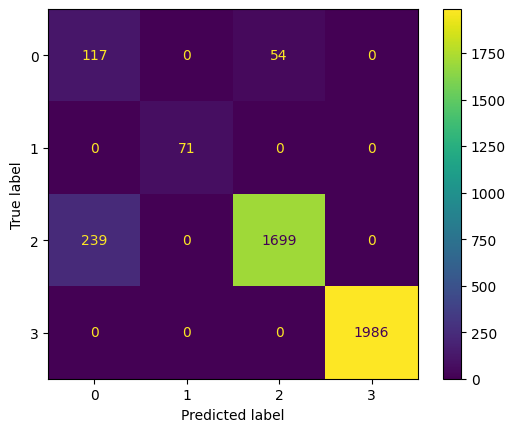

epsilon = 0.1
FPR: [0.00025031 0.         0.01436266 0.        ]
TPR: [0.8128655 1.        0.999484  1.       ]
FNR: [0.1871345 0.        0.000516  0.       ]
TNR: [0.99974969 1.         0.98563734 1.        ]
Accuracy: 0.9920787325972156
Precision(micro,macro,weighted): 0.9920787325972156,0.9941513095842704,0.9921465147548472
F1(micro,macro,weighted: 0.9920787325972156,0.9713610742364476,0.9917153682980835
Recall(micro,macro,weighted: 0.9920787325972156,0.9530873753009976,0.9920787325972156
FPR: 0.003653242495668958
tpr: 0.9530873753009976
fnr: 0.046912624699002405
tnr: 0.9963467575043311


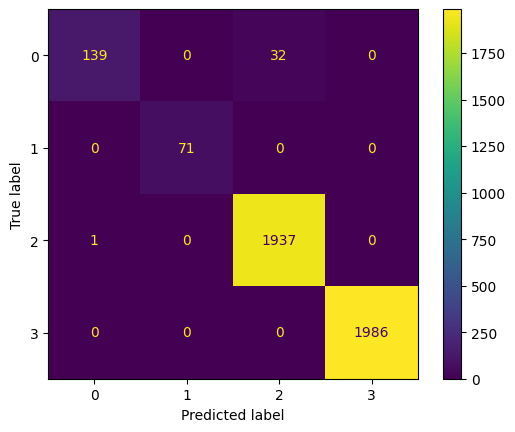

epsilon = 0.2
FPR: [0.03078849 0.         0.10861759 0.        ]
TPR: [0.         0.         0.93653251 1.        ]
FNR: [1.         1.         0.06346749 0.        ]
TNR: [0.96921151 1.         0.89138241 1.        ]
Accuracy: 0.9123859817570812
Precision(micro,macro,weighted): 0.9123859817570812,0.47058823529411764,0.8871819491118579
F1(micro,macro,weighted: 0.9123859817570812,0.4771589486858573,0.8994085862248599
Recall(micro,macro,weighted: 0.9123859817570812,0.48413312693498456,0.9123859817570812
FPR: 0.03485151996548648
tpr: 0.48413312693498456
fnr: 0.5158668730650154
tnr: 0.9651484800345136


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


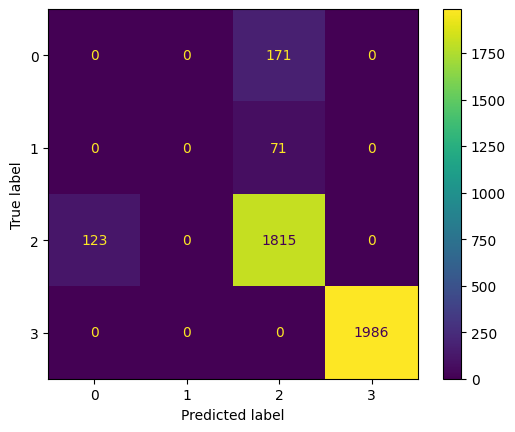

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.3
FPR: [0.0310388  0.         0.10861759 0.        ]
TPR: [0.         0.         0.93601651 1.        ]
FNR: [1.         1.         0.06398349 0.        ]
TNR: [0.9689612  1.         0.89138241 1.        ]
Accuracy: 0.9121459433509361
Precision(micro,macro,weighted): 0.9121459433509361,0.4705739299610895,0.8871553300668185
F1(micro,macro,weighted: 0.9121459433509361,0.4770906359539309,0.8992814714149957
Recall(micro,macro,weighted: 0.9121459433509361,0.4840041279669762,0.9121459433509361
FPR: 0.03491409818826496
tpr: 0.4840041279669762
fnr: 0.5159958720330238
tnr: 0.965085901811735


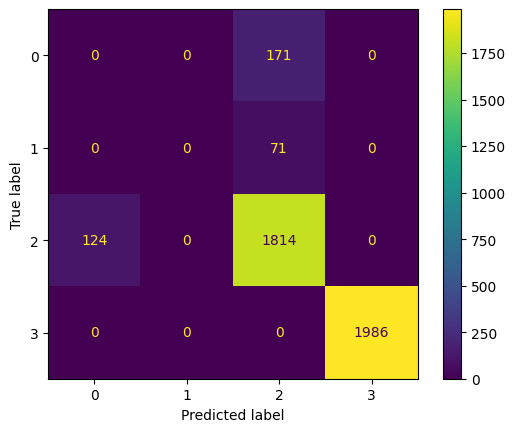

epsilon = 0.01
FPR: [0.05982478 0.         0.02423698 0.        ]
TPR: [0.68421053 1.         0.87667699 1.        ]
FNR: [0.31578947 0.         0.12332301 0.        ]
TNR: [0.94017522 1.         0.97576302 1.        ]
Accuracy: 0.92966874699952
Precision(micro,macro,weighted): 0.92966874699952,0.8244618374920681,0.9581134508278024
F1(micro,macro,weighted: 0.92966874699952,0.8411601222934704,0.9402508479896459
Recall(micro,macro,weighted: 0.92966874699952,0.8902218782249742,0.92966874699952
FPR: 0.021015441204557762
tpr: 0.8902218782249742
fnr: 0.1097781217750258
tnr: 0.9789845587954422


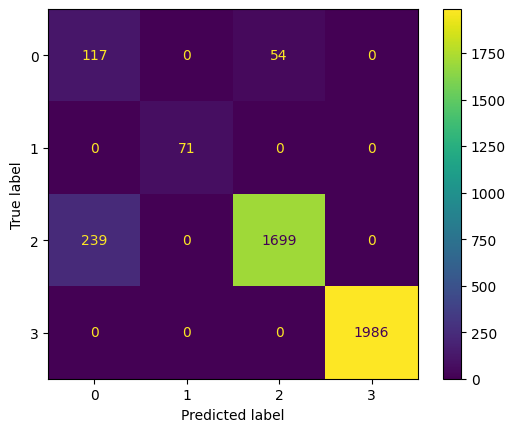

epsilon = 0.1
FPR: [0.00025031 0.         0.01436266 0.        ]
TPR: [0.8128655 1.        0.999484  1.       ]
FNR: [0.1871345 0.        0.000516  0.       ]
TNR: [0.99974969 1.         0.98563734 1.        ]
Accuracy: 0.9920787325972156
Precision(micro,macro,weighted): 0.9920787325972156,0.9941513095842704,0.9921465147548472
F1(micro,macro,weighted: 0.9920787325972156,0.9713610742364476,0.9917153682980835
Recall(micro,macro,weighted: 0.9920787325972156,0.9530873753009976,0.9920787325972156
FPR: 0.003653242495668958
tpr: 0.9530873753009976
fnr: 0.046912624699002405
tnr: 0.9963467575043311


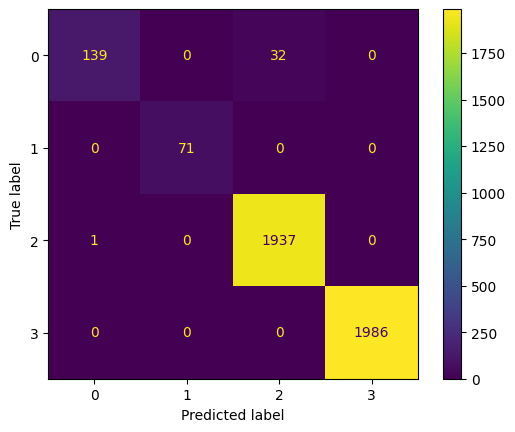

epsilon = 0.2
FPR: [0.03078849 0.         0.10412926 0.        ]
TPR: [0.05847953 0.         0.93653251 1.        ]
FNR: [0.94152047 1.         0.06346749 0.        ]
TNR: [0.96921151 1.         0.89587074 1.        ]
Accuracy: 0.914786365818531
Precision(micro,macro,weighted): 0.914786365818531,0.4904628449482279,0.8922733632216803
F1(micro,macro,weighted: 0.914786365818531,0.49417635210988575,0.9031697267296771
Recall(micro,macro,weighted: 0.914786365818531,0.4987530099759202,0.914786365818531
FPR: 0.033729437380208206
tpr: 0.4987530099759202
fnr: 0.5012469900240798
tnr: 0.9662705626197918


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


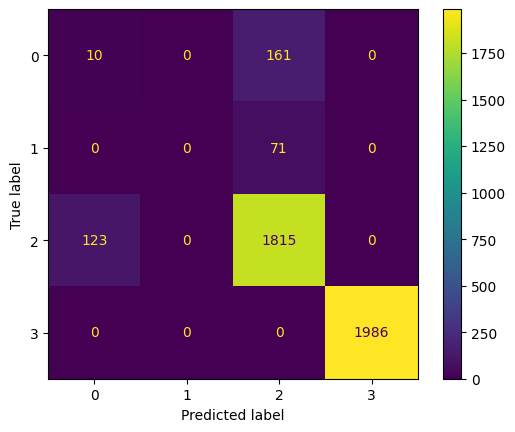

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.3
FPR: [0.0310388 0.        0.1032316 0.       ]
TPR: [0.07017544 0.         0.93601651 1.        ]
FNR: [0.92982456 1.         0.06398349 0.        ]
TNR: [0.9689612 1.        0.8967684 1.       ]
Accuracy: 0.915026404224676
Precision(micro,macro,weighted): 0.915026404224676,0.4939277080695292,0.8931867086531703
F1(micro,macro,weighted: 0.915026404224676,0.4973189613848638,0.9037637496010261
Recall(micro,macro,weighted: 0.915026404224676,0.5015479876160991,0.915026404224676
FPR: 0.03356759908593102
tpr: 0.5015479876160991
fnr: 0.4984520123839009
tnr: 0.966432400914069


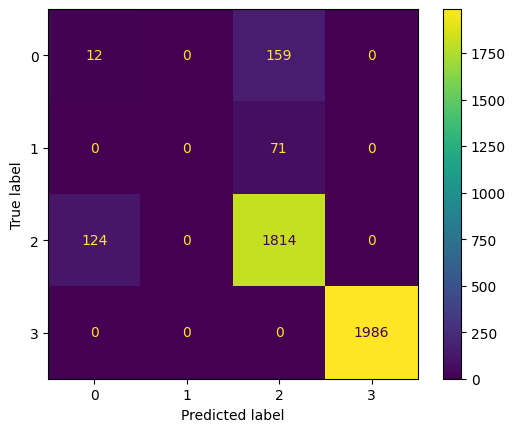

epsilon = 0.01
FPR: [0.05982478 0.         0.02423698 0.        ]
TPR: [0.68421053 1.         0.87667699 1.        ]
FNR: [0.31578947 0.         0.12332301 0.        ]
TNR: [0.94017522 1.         0.97576302 1.        ]
Accuracy: 0.92966874699952
Precision(micro,macro,weighted): 0.92966874699952,0.8244618374920681,0.9581134508278024
F1(micro,macro,weighted: 0.92966874699952,0.8411601222934704,0.9402508479896459
Recall(micro,macro,weighted: 0.92966874699952,0.8902218782249742,0.92966874699952
FPR: 0.021015441204557762
tpr: 0.8902218782249742
fnr: 0.1097781217750258
tnr: 0.9789845587954422


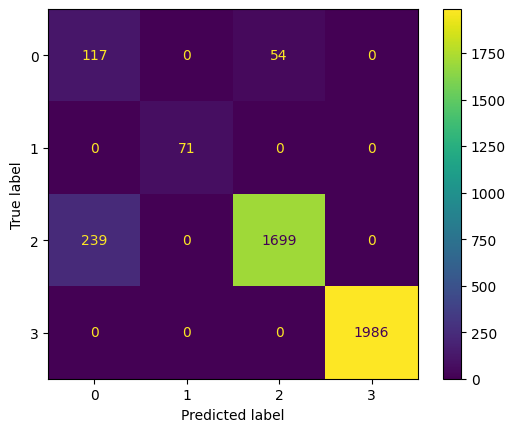

epsilon = 0.1
FPR: [0.00025031 0.         0.01436266 0.        ]
TPR: [0.8128655 1.        0.999484  1.       ]
FNR: [0.1871345 0.        0.000516  0.       ]
TNR: [0.99974969 1.         0.98563734 1.        ]
Accuracy: 0.9920787325972156
Precision(micro,macro,weighted): 0.9920787325972156,0.9941513095842704,0.9921465147548472
F1(micro,macro,weighted: 0.9920787325972156,0.9713610742364476,0.9917153682980835
Recall(micro,macro,weighted: 0.9920787325972156,0.9530873753009976,0.9920787325972156
FPR: 0.003653242495668958
tpr: 0.9530873753009976
fnr: 0.046912624699002405
tnr: 0.9963467575043311


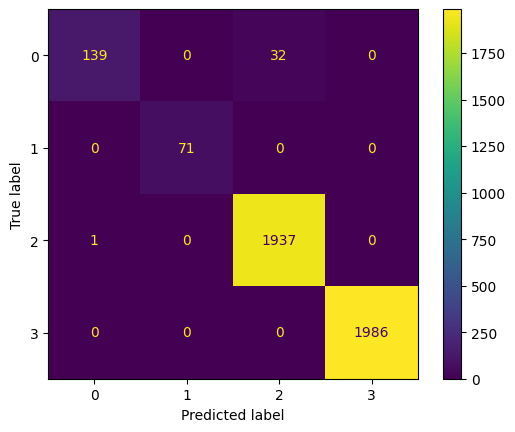

epsilon = 0.2
FPR: [0.03078849 0.         0.10412926 0.        ]
TPR: [0.05847953 0.         0.93653251 1.        ]
FNR: [0.94152047 1.         0.06346749 0.        ]
TNR: [0.96921151 1.         0.89587074 1.        ]
Accuracy: 0.914786365818531
Precision(micro,macro,weighted): 0.914786365818531,0.4904628449482279,0.8922733632216803
F1(micro,macro,weighted: 0.914786365818531,0.49417635210988575,0.9031697267296771
Recall(micro,macro,weighted: 0.914786365818531,0.4987530099759202,0.914786365818531
FPR: 0.033729437380208206
tpr: 0.4987530099759202
fnr: 0.5012469900240798
tnr: 0.9662705626197918


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


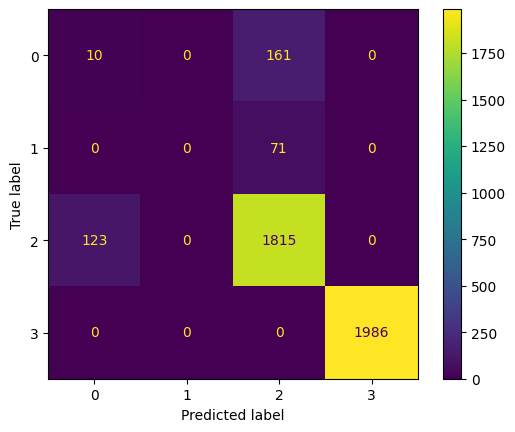

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.3
FPR: [0.0310388 0.        0.1032316 0.       ]
TPR: [0.07017544 0.         0.93601651 1.        ]
FNR: [0.92982456 1.         0.06398349 0.        ]
TNR: [0.9689612 1.        0.8967684 1.       ]
Accuracy: 0.915026404224676
Precision(micro,macro,weighted): 0.915026404224676,0.4939277080695292,0.8931867086531703
F1(micro,macro,weighted: 0.915026404224676,0.4973189613848638,0.9037637496010261
Recall(micro,macro,weighted: 0.915026404224676,0.5015479876160991,0.915026404224676
FPR: 0.03356759908593102
tpr: 0.5015479876160991
fnr: 0.4984520123839009
tnr: 0.966432400914069


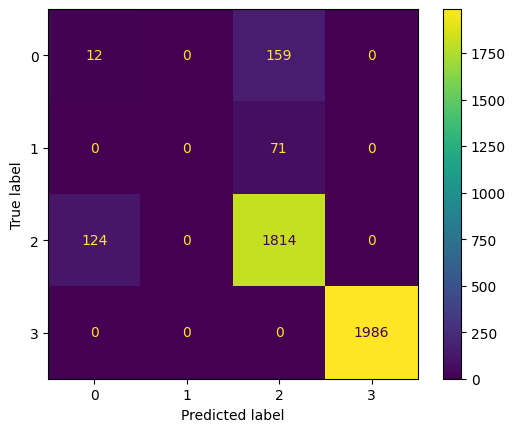

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-07
FPR: [0.08460576 0.         0.84290844 0.84633028]
TPR: [0.15204678 0.         0.04076367 0.        ]
FNR: [0.84795322 1.         0.95923633 1.        ]
TNR: [0.91539424 1.         0.15709156 0.15366972]
Accuracy: 0.025204032645223237
Precision(micro,macro,weighted): 0.025204032645223237,0.027949120373749907,0.021710824633467008
F1(micro,macro,weighted: 0.025204032645223237,0.034440272095785394,0.022860104391263802
Recall(micro,macro,weighted: 0.025204032645223237,0.04820261437908496,0.025204032645223237
FPR: 0.4434611176217237
tpr: 0.04820261437908496
fnr: 0.9517973856209151
tnr: 0.5565388823782763


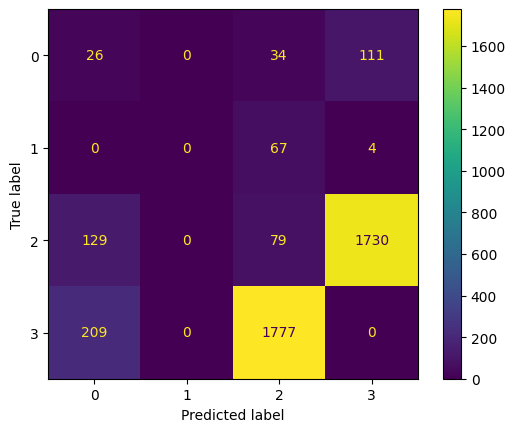

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-06
FPR: [0.08460576 0.         0.84290844 0.84633028]
TPR: [0.15204678 0.         0.04076367 0.        ]
FNR: [0.84795322 1.         0.95923633 1.        ]
TNR: [0.91539424 1.         0.15709156 0.15366972]
Accuracy: 0.025204032645223237
Precision(micro,macro,weighted): 0.025204032645223237,0.027949120373749907,0.021710824633467008
F1(micro,macro,weighted: 0.025204032645223237,0.034440272095785394,0.022860104391263802
Recall(micro,macro,weighted: 0.025204032645223237,0.04820261437908496,0.025204032645223237
FPR: 0.4434611176217237
tpr: 0.04820261437908496
fnr: 0.9517973856209151
tnr: 0.5565388823782763


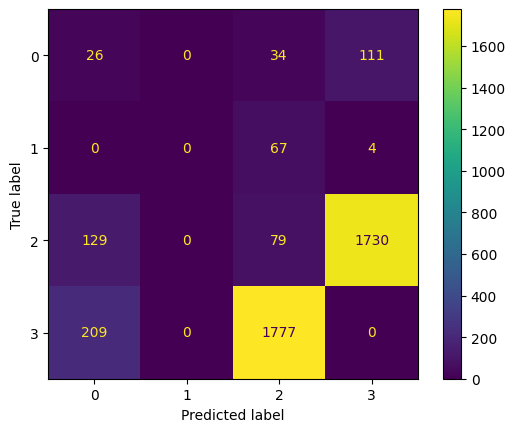

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-05
FPR: [0.08460576 0.         0.84290844 0.84633028]
TPR: [0.15204678 0.         0.04076367 0.        ]
FNR: [0.84795322 1.         0.95923633 1.        ]
TNR: [0.91539424 1.         0.15709156 0.15366972]
Accuracy: 0.025204032645223237
Precision(micro,macro,weighted): 0.025204032645223237,0.027949120373749907,0.021710824633467008
F1(micro,macro,weighted: 0.025204032645223237,0.034440272095785394,0.022860104391263802
Recall(micro,macro,weighted: 0.025204032645223237,0.04820261437908496,0.025204032645223237
FPR: 0.4434611176217237
tpr: 0.04820261437908496
fnr: 0.9517973856209151
tnr: 0.5565388823782763


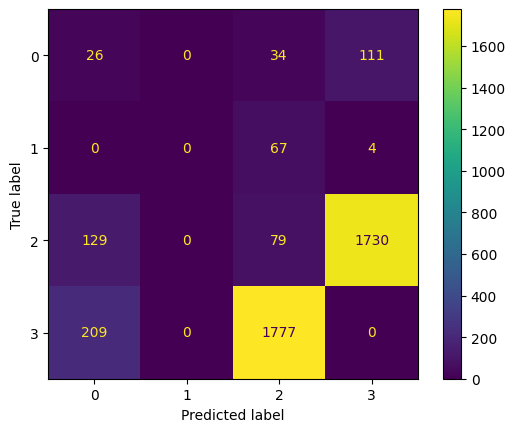

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.0001
FPR: [0.08460576 0.         0.84290844 0.84633028]
TPR: [0.15204678 0.         0.04076367 0.        ]
FNR: [0.84795322 1.         0.95923633 1.        ]
TNR: [0.91539424 1.         0.15709156 0.15366972]
Accuracy: 0.025204032645223237
Precision(micro,macro,weighted): 0.025204032645223237,0.027949120373749907,0.021710824633467008
F1(micro,macro,weighted: 0.025204032645223237,0.034440272095785394,0.022860104391263802
Recall(micro,macro,weighted: 0.025204032645223237,0.04820261437908496,0.025204032645223237
FPR: 0.4434611176217237
tpr: 0.04820261437908496
fnr: 0.9517973856209151
tnr: 0.5565388823782763


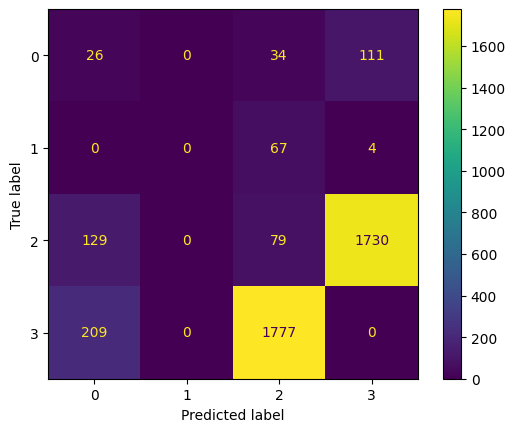

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attack/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, best_dt, "DT", "FGSM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attack/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, best_dt, "DT", "BIM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attack/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, best_dt, "DT", "PGD", epsilon)

DF_eps = [1e-07, 1e-06, 1e-05, 1e-04]
for epsilon in DF_eps:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attack/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, best_dt, "DT", "DF", epsilon)